### E-commerce Sales Analysis

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ecommerce_sales_analysis_project\data\ecommerce_orders.csv")
df.head()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95


In [3]:
# check the data type
df.dtypes

OrderID              int64
CustomerID           int64
OrderDate           object
Category            object
OrderValue         float64
DiscountApplied      int64
PaymentMethod       object
Revenue            float64
dtype: object

In [4]:
# chenge the data type
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.dtypes

OrderID                     int64
CustomerID                  int64
OrderDate          datetime64[ns]
Category                   object
OrderValue                float64
DiscountApplied             int64
PaymentMethod              object
Revenue                   float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    int64         
 1   CustomerID       100 non-null    int64         
 2   OrderDate        100 non-null    datetime64[ns]
 3   Category         100 non-null    object        
 4   OrderValue       100 non-null    float64       
 5   DiscountApplied  100 non-null    int64         
 6   PaymentMethod    100 non-null    object        
 7   Revenue          100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 6.4+ KB


In [6]:
# check the null values
df.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64

In [7]:
# check the duplicates
df.duplicated().sum()

0

In [8]:
# check the unique values
df.nunique()

OrderID            100
CustomerID          20
OrderDate          100
Category             4
OrderValue          99
DiscountApplied      5
PaymentMethod        3
Revenue            100
dtype: int64

In [9]:
# check the summary statistics
df.describe()


,OrderID,CustomerID,OrderDate,OrderValue,DiscountApplied,Revenue
count,100.000000,100.000000,100,100.000000,100.000000,100.000000
mean,1050.500000,10.010000,2024-02-19 12:00:00,101.712700,10.750000,91.477000
min,1001.000000,1.000000,2024-01-01 00:00:00,42.440000,0.000000,33.950000
25%,1025.750000,5.750000,2024-01-25 18:00:00,75.492500,5.000000,70.422500
50%,1050.500000,9.500000,2024-02-19 12:00:00,105.220000,10.000000,93.825000
75%,1075.250000,15.000000,2024-03-15 06:00:00,119.002500,16.250000,105.837500
max,1100.000000,20.000000,2024-04-09 00:00:00,181.610000,20.000000,181.610000
std,29.011492,5.535003,NaN,28.941132,7.295183,29.551128


In [10]:
df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'Category', 'OrderValue',
       'DiscountApplied', 'PaymentMethod', 'Revenue'],
      dtype='object')

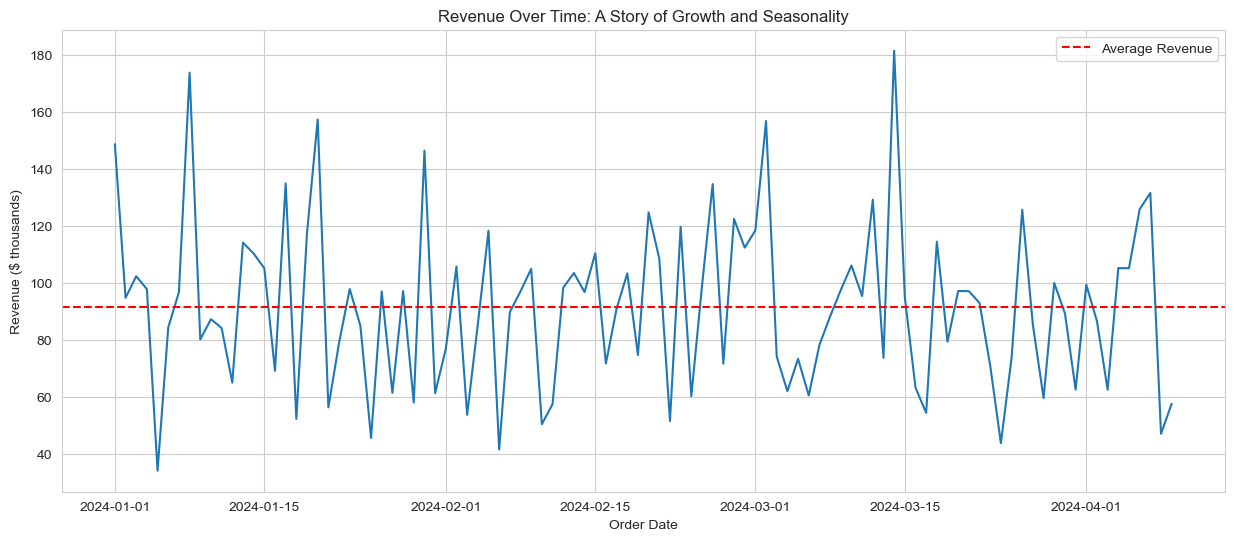

In [ ]:
# Create the line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='OrderDate', y='Revenue', data=df,)
plt.title('Revenue Over Time: A Story of Growth and Seasonality')
plt.xlabel('Order Date')
plt.ylabel('Revenue ($ thousands)')
# Adding a horizontal line to represent the average revenue
avg_revenue = df['Revenue'].mean()
plt.axhline(avg_revenue, color='red', linestyle='--', label='Average Revenue')
plt.legend()
plt.show()

In [29]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=df['OrderDate'], y=df['Revenue'], mode='lines', name='Revenue')])
avg_revenue = df['Revenue'].mean()
fig.add_hline(y=avg_revenue, line_dash='dash', line_color='red')
fig.update_layout(title='Revenue Over Time: A Story of Growth and Seasonality',
                  xaxis_title='Order Date',
                  yaxis_title='Revenue ($ thousands)')
fig.show()

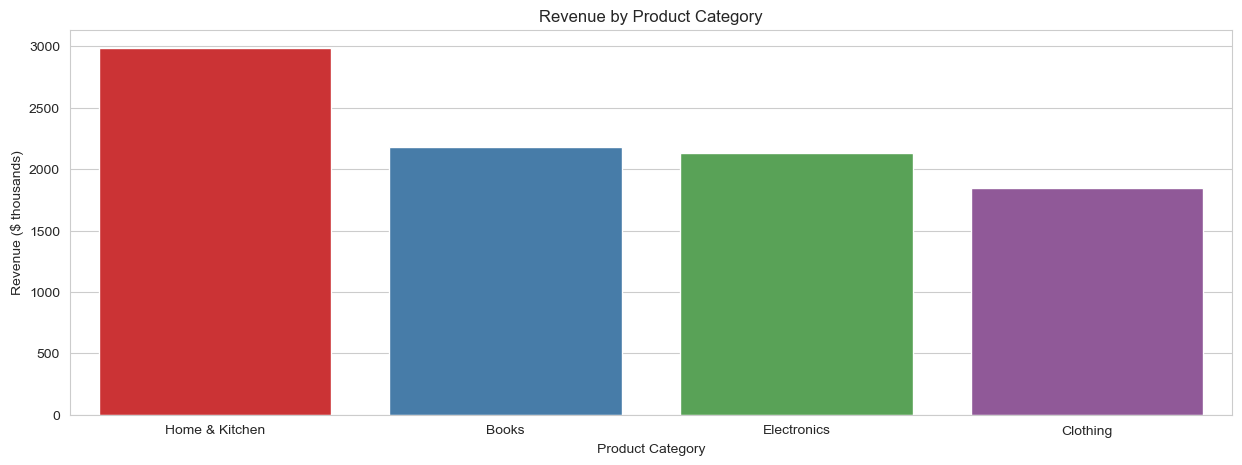

In [45]:
# Revenue by product category in seaborn
plt.figure(figsize=(15,5))
df_sorted = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Category', y='Revenue', data=df_sorted,palette='Set1')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue ($ thousands)')
plt.show()

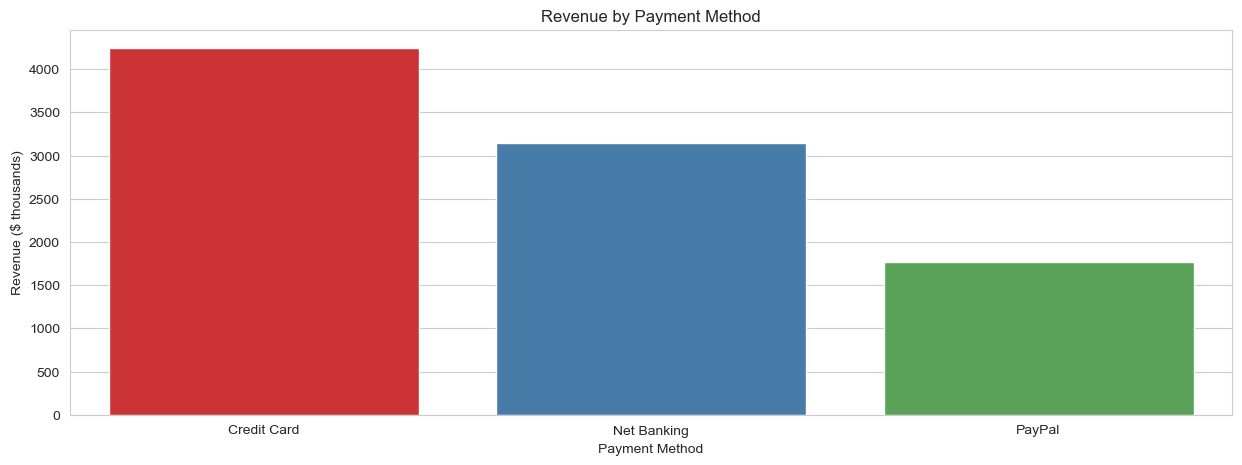

In [46]:
# Analyze payment methods in seaborn
plt.figure(figsize=(15,5))
df_sorted = df.groupby('PaymentMethod')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='PaymentMethod', y='Revenue', data=df_sorted,palette='Set1')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue ($ thousands)')
plt.show()

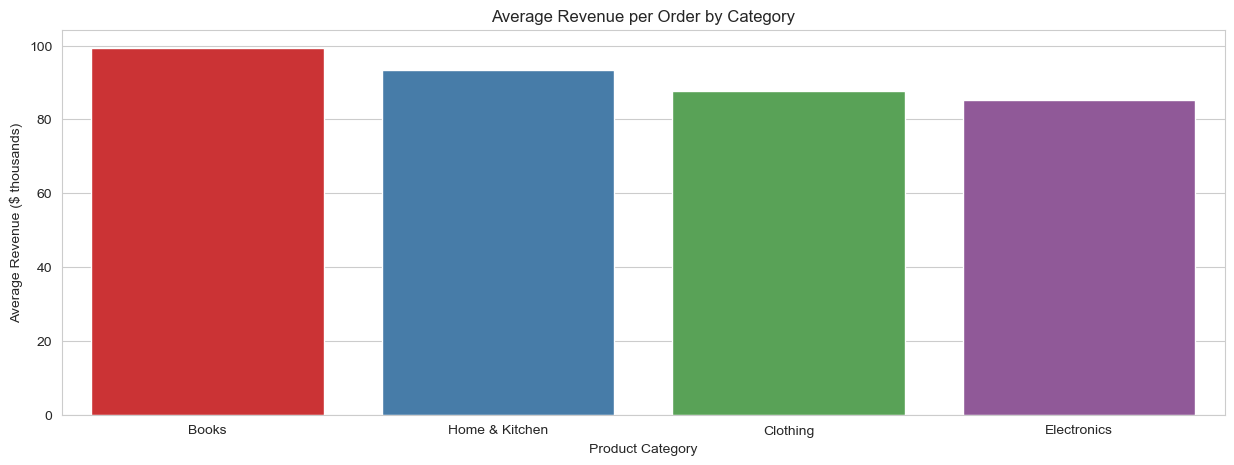

In [47]:
# Average Revenue per order by category in seaborn
plt.figure(figsize=(15,5))
df_sorted = df.groupby('Category')['Revenue'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Category', y='Revenue', data=df_sorted,palette='Set1')
plt.title('Average Revenue per Order by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue ($ thousands)')
plt.show()

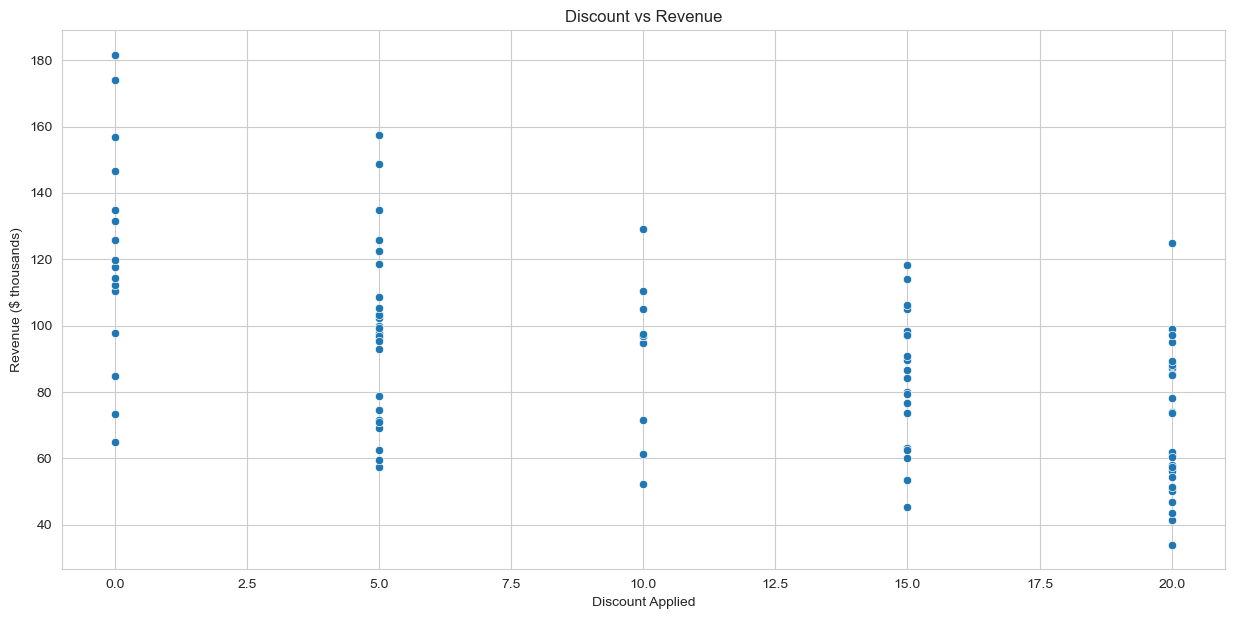

In [49]:
# Discount vs Revenue in seaborn
plt.figure(figsize=(15,7))
sns.scatterplot(x='DiscountApplied', y='Revenue', data=df)
plt.title('Discount vs Revenue')
plt.xlabel('Discount Applied')
plt.ylabel('Revenue ($ thousands)')
plt.show()

In [51]:
# Most frequent customer in descending order
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)

CustomerID
8     9
7     8
12    8
15    8
4     6
9     6
2     6
1     5
3     5
18    5
14    4
19    4
16    4
11    4
10    4
13    3
17    3
5     3
20    3
6     2
Name: OrderID, dtype: int64

In [55]:
# Average order value by Month
df.groupby('OrderDate')['OrderValue'].mean().sort_values(ascending=False)

OrderDate
2024-03-14    181.61
2024-01-08    173.90
2024-01-20    165.71
2024-03-02    156.90
2024-01-01    156.59
               ...  
2024-01-18     57.94
2024-03-24     54.55
2024-01-25     53.48
2024-02-06     51.78
2024-01-05     42.44
Name: OrderValue, Length: 100, dtype: float64

### Insights after EDA and Suggestions

### Trends in revenue

Revenue goes up and down a lot. There are high points, like $180K in early March, and low points, like below $50K in mid-April. On average, daily revenue is around $90K.

Recommendation:
Look into what’s causing the drop in April—could be outside trends or internal problems. Also, use the busy times (like March) to run promotions and boost sales even more.

### Top-performing categories

Home & Kitchen is the top-performing category with $300K in revenue, followed by Books at $220K, Electronics at $210K, and Clothing at $190K. Books have the highest average order value at $100K, while Home & Kitchen averages $90K per order. To grow sales, it's recommended to promote best-selling Home & Kitchen items to increase volume, use bundling or cross-selling strategies for Books to boost average order value, and analyze underperforming subcategories in Electronics and Clothing to adjust inventory and pricing.

### Popular payment methods

Credit Card is the most popular payment method, generating $420K in revenue, followed by Net Banking at $310K and PayPal at $170K. To improve efficiency, the business should streamline its credit card processing system. At the same time, it should promote alternative options like PayPal through targeted incentives to encourage more diverse payment choices.

### Business Recommendations

Avoid blanket discounts; instead, target specific products or customer segments .
Test moderate discounts (5–10%) with limited-time offers to balance revenue and customer attraction.
Peaks in January and March suggest holiday/sales-driven demand. Plan promotions around these periods.
Launch targeted campaigns for Home & Kitchen and Books.